In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from scipy.stats import f_oneway
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Personal Projects/Salary Project/Salary_Data_Based_country_and_race.csv"
df = pd.read_csv(filepath)
#print(df.head(10))
print(df.describe())


        Unnamed: 0          Age  Years of Experience         Salary
count  6704.000000  6702.000000          6701.000000    6699.000000
mean   3351.500000    33.620859             8.094687  115326.964771
std    1935.422435     7.614633             6.059003   52786.183911
min       0.000000    21.000000             0.000000     350.000000
25%    1675.750000    28.000000             3.000000   70000.000000
50%    3351.500000    32.000000             7.000000  115000.000000
75%    5027.250000    38.000000            12.000000  160000.000000
max    6703.000000    62.000000            34.000000  250000.000000


In [ ]:
numerical_columns = ['Age', 'Years of Experience', 'Salary']
categorical_columns = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']

print(numerical_columns)
print(df[numerical_columns].describe())

print()

print(categorical_columns)
for col in categorical_columns:
  print(df[col].value_counts())

['Age', 'Years of Experience', 'Salary']
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

['Gender', 'Education Level', 'Job Title', 'Country', 'Race']
Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Anal

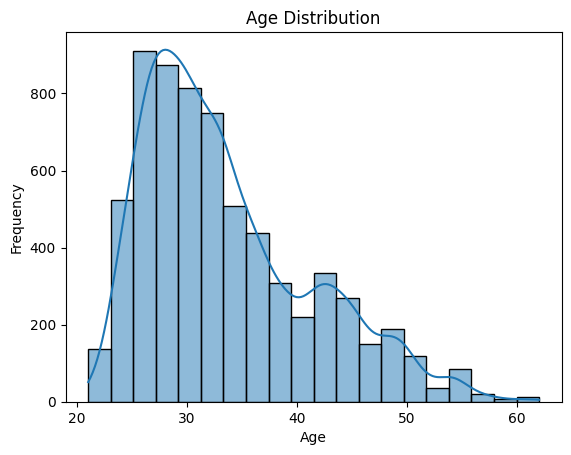

In [ ]:
#Histogram
sb.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

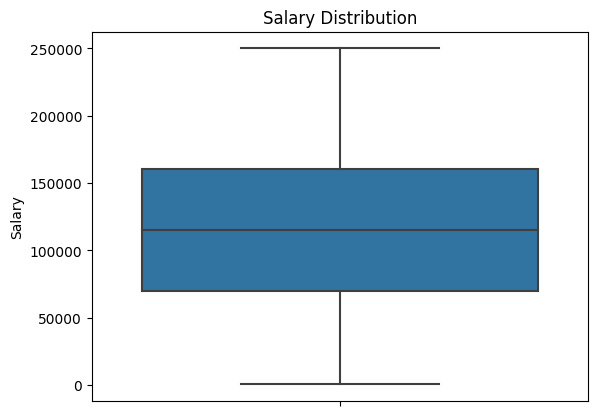

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6704, dtype: float64


In [ ]:
#BoxPlot
sb.boxplot(y='Salary', data=df)
plt.ylabel('Salary')
plt.title('Salary Distribution')
plt.show()
print(df["Salary"])

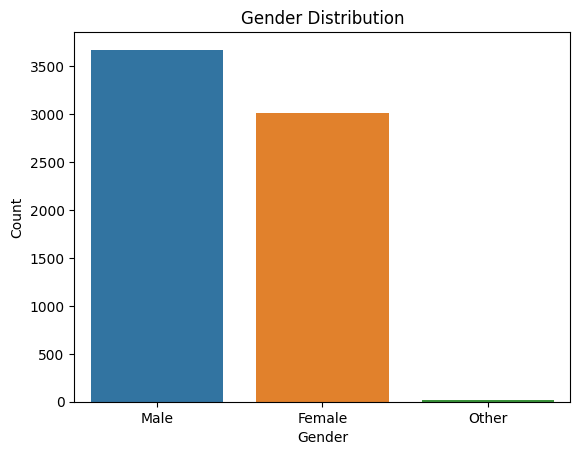

In [ ]:
#Barplot
sb.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

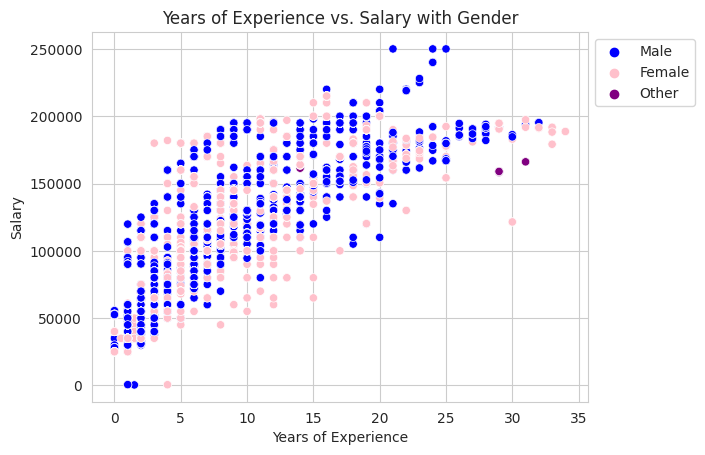

In [ ]:
#ScatterPlot
sb.set_style("whitegrid")

# Use a specific color palette for gender categories
gender_palette = {"Male": "blue", "Female": "pink", "Other": "purple"}
sb.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=df, palette=gender_palette)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary with Gender')

# Show the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [ ]:
#USING PLOTLY -> YRS OF EXP, EDU, SALARY + GENDER

education_map = {
    "Master's Degree" : "Master's",
    "Bachelor's Degree" : "Bachelor's",
    "PhD" : "phD"
}

gender_color = {
    "Male" : "light blue",
    "Female" : "pink",
    "Other" : "purple"
}

df['Education Combined'] = df['Education Level'].replace(education_map)

# Data to be plotted
df_cleaned = df.dropna(subset=['Education Combined'])
# Plotting the figure
fig = px.scatter_3d(df_cleaned, x = df_cleaned['Years of Experience'],
                    y = df_cleaned['Education Combined'],
                    z = df_cleaned['Salary'],
                    color = 'Gender',
                    color_discrete_map = gender_color
                    )

fig.update_layout(
    title='3D Scatter Plot: Salary vs. Years of Experience vs. Education Level',
    scene=dict(
        xaxis_title='Years of Experience',
        yaxis_title='Education Level',
        zaxis_title='Salary',
        bgcolor = "white"
    ),
    font=dict(
        family="Times New Roman, sans-serif",
        size=14,
        color="black"
    )
)

fig.show()

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race', 'Experience Range'],
      dtype='object')


In [ ]:
#T-Test

#group data by gender
grouped_data = df.groupby('Gender')

#1. Mean
mean_salary_men = grouped_data.get_group('Male')['Salary'].mean()
mean_salary_women = grouped_data.get_group('Female')['Salary'].mean()

print('Mean of Men: ',mean_salary_men);
print('Mean of Women: ',mean_salary_women);

#2. Std dev
std_dev_men = grouped_data.get_group('Male')['Salary'].std()
std_dev_women = grouped_data.get_group('Female')['Salary'].std()
print()
print('Std Dev of Men: ',std_dev_men);
print('Std Dev of Women: ',std_dev_women);

overall_mean = df["Salary"].mean()
# Handling Null - Imputating
for box in df["Salary"]:
    if pd.isnull(box):
        df["Salary"] = overall_mean

#3. TEST
#Std deviations are diff, thus, we're using welch's t-test
#stats.ttest_ind() function from scipy takes 2 parameters, both arrays for independant t-test
t_stat, p_val = stats.ttest_ind(df[df['Gender']=="Male"]["Salary"],
                                df[df["Gender"] == "Female"]["Salary"],
                                equal_var = False)

print(t_stat) #0, weak evidence against null hyp - similar salaries
print(p_val) #1, observed diff is probably due to random chance
#equal_var = False -> std deviations aren't equal, thus variance isn't equal, therefore set to false

In [ ]:
salary_range = df['Salary'].max() - df['Salary'].min()
print("Range of Salary:", salary_range)


Range of Salary: 249650.0


In [ ]:
#Cleaning data by dropping null values using dropna
var_years = df.groupby('Years of Experience')['Salary'].var()
df_cleaned = df.dropna(subset=['Years of Experience', 'Salary'])
print(df_cleaned['Years of Experience'].isnull().sum())

0


In [ ]:
#Years of Experience - ANOVA

# Define the bin edges for the different ranges
bins = [0, 5, 10, 15, 20, 25, 30]

# Define the labels for the ranges
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

# Use pd.cut() to create a new column 'Experience Range' with the corresponding bin labels
df['Experience Range'] = pd.cut(df['Years of Experience'], bins=bins, labels=labels, right=False)
grouped_data = df.groupby('Experience Range')

arr0_5 = grouped_data.get_group('0-5')['Salary'].dropna()
arr5_10 = grouped_data.get_group('5-10')['Salary'].dropna()
arr10_15 = grouped_data.get_group('10-15')['Salary'].dropna()
arr15_20 = grouped_data.get_group('15-20')['Salary'].dropna()
arr20_25 = grouped_data.get_group('20-25')['Salary'].dropna()
arr25_30 = grouped_data.get_group('25-30')['Salary'].dropna()

f_oneway(arr0_5, arr5_10, arr10_15, arr15_20, arr20_25, arr25_30)
#F_onewayResult(statistic=2892.665336919322, pvalue=0.0)
#Low p value rejects null hyp
#High statistic: there's more diff between the groups than there is within the group

In [ ]:
var_years = df.groupby('Education Level')['Salary'].var()
print(var_years)
df_cleaned = df.dropna(subset=['Education Level'])
print(df_cleaned['Education Level'].isnull().sum())

In [ ]:
#Education Level - ANOVA

grouped_edu = df.groupby('Education Level')

bachelor = grouped_edu.get_group("Bachelor's Degree")['Salary'].dropna()
bachelor2 = grouped_edu.get_group("Bachelor's")['Salary'].dropna()
merged_bachelor = pd.concat([bachelor, bachelor2], ignore_index=True)

master = grouped_edu.get_group("Master's Degree")['Salary'].dropna()
master2 = grouped_edu.get_group("Master's")['Salary'].dropna()
merged_master = pd.concat([master, master2], ignore_index=True)

phd = grouped_edu.get_group("PhD")['Salary'].dropna()
phd2 = grouped_edu.get_group("phD")['Salary'].dropna()
merged_phd = pd.concat([phd, phd2], ignore_index = True)

highschool = grouped_edu.get_group("High School")['Salary'].dropna()

f_oneway(merged_bachelor, merged_master, merged_phd, highschool)
#F_onewayResult(statistic=1630.9393525726196, pvalue=0.0)

F_onewayResult(statistic=1630.9393525726196, pvalue=0.0)

In [ ]:
#Difference between phd and masters
t_stat, p_val = stats.ttest_ind(merged_phd, merged_master)
print(t_stat) #26.19643266234008 -significant diff
print(p_val) #2.5827013430995746e-137 - less value, cannot reject null hyp

mean_phd = merged_phd.mean()
mean_mast = merged_master.mean()
diff = mean_phd - mean_mast
print("Mean_phd", mean_phd, " Mean mast", mean_mast, " Diff", diff)

In [ ]:
#Country - ANOVA

#STEP1: Clean the data
df_cleaned = df.dropna(subset=['Country'])
print(df_cleaned['Country'].isnull().sum())

#STEP2: Check for variance as ANOVA test depends on variance
grouped_data = df_cleaned.groupby('Country') #Group the data and assign it to dataframe
var_country = grouped_data['Salary'].var()
#print(var_country)

#STEP3: Make arrays of the countries
Australia = grouped_data.get_group('Australia')['Salary'].dropna()
Canada = grouped_data.get_group('Canada')['Salary'].dropna()
China = grouped_data.get_group('China')['Salary'].dropna()
UK = grouped_data.get_group('UK')['Salary'].dropna()
USA = grouped_data.get_group('USA')['Salary'].dropna()

#STEP4: Anova Testing
f_oneway(Australia, Canada, China, UK, USA)
#F_onewayResult(statistic=1.0151015795355185, pvalue=0.3979757356026538)
#The F-statistic of 1.0151 suggests that the means of the groups are similar. The p-value of 0.3979 indicates that the probability of observing such a difference in means if there were no real difference between the groups is relatively high.
#Therefore, based on this result, you cannot reject the null hypothesis, and there is no statistically significant difference in the variable you tested across the groups.

In [ ]:
#Race - ANOVA

#Step1: Clean the data
df_cleaned = df.dropna(subset=["Race"])
print(df_cleaned["Race"].isnull().sum())

#Step2: Divide in groups & Check var
grouped_data = df_cleaned.groupby('Race')
var_race = grouped_data['Salary'].var()
print(var_race)

#Step3: Divide into arrays
afri = grouped_data.get_group('African American')['Salary'].dropna()
bla = grouped_data.get_group('Black')['Salary'].dropna()
merged_afri = pd.concat([afri, bla], ignore_index=True)

asian = grouped_data.get_group('Asian')['Salary'].dropna()
aus = grouped_data.get_group('Australian')['Salary'].dropna()
chin = grouped_data.get_group('Chinese')['Salary'].dropna()
his = grouped_data.get_group('Hispanic')['Salary'].dropna()
kor = grouped_data.get_group('Korean')['Salary'].dropna()
mix = grouped_data.get_group('Mixed')['Salary'].dropna()
wel = grouped_data.get_group('Welsh')['Salary'].dropna()
whi = grouped_data.get_group('White')['Salary'].dropna()

f_oneway(merged_afri, asian, aus, chin, his, kor, mix, wel, whi)
#F_onewayResult(statistic=1.1907321123205628, pvalue=0.3000853257762943)